# Home Assignment No. 3: Part 2

In this part of the homework you are to solve several problems related to machine learning algorithms.
* Your solution must me **COMPLETE**, i.e. contain all required formulas/proofs/detailed explanations.
* You must write your solution for any problem just right after the words **BEGIN SOLUTION**. Attaching pictures of your handwriting is allowed, but **highly discouraged**.
* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of our yown code. There exists a class/method for almost everything you can imagine (related to this homework).
* To do some tasks in this part of homework, you have to write **CODE** directly inside specified places inside notebook **CELLS**.
* In some problems you may be asked to provide short discussion of the results. In this cases you have to create **MARKDOWN** cell with your comments right after the your code cell.
* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e. if the reviewer decides to execute `Kernel` -> `Restart Kernel and Run All Cells`, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest to fix random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include neccessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.
* The are problems with \* mark - they are not obligatory. You can get **EXTRA POINTS** for solving them.
## $\LaTeX$ in Jupyter
Jupyter has constantly improving $\LaTeX$ support. Below are the basic methods to
write **neat, tidy, and well typeset** equations in your notebooks:
* to write an **inline** equation use 
```markdown
$ you latex equation here $
```
* to write an equation, that is **displayed on a separate line** use 
```markdown
$$ you latex equation here $$
```
* to write a **block of equations** use 
```markdown
\begin{align}
    left-hand-side
        &= right-hand-side on line 1
        \\
        &= right-hand-side on line 2
        \\
        &= right-hand-side on the last line
\end{align}
```
The **ampersand** (`&`) aligns the equations horizontally and the **double backslash**
(`\\`) creates a new line.

Write your theoretical derivations within such blocks:
```markdown
**BEGIN Solution**

<!-- >>> your derivation here <<< -->

**END Solution**
```

Please, write your implementation within the designated blocks:
```python
...
### BEGIN Solution

# >>> your solution here <<<

### END Solution
...
```


<br>

# Clustering

## Task 1 (1 + 2 = 3 pt.): Practice with Different Clustering Algorithms

### Task 1.1 (1 pt.)

Try `KMeans`, `Gaussian Mixture` and **two** more clustering algorithms from `sklearn`. 
To evaluate clustering performance use **two** clustering metrics: `silhouette score`
and `adjusted mutual information`.

For each algorithm **your task** is to try to find the parameters leading to the best performance for `n_clusters=true_number_of_clusters`:
1. Apply the algorithm with the true number of clusters and at least two **other settings** for the number of clusters: a smaller and a larger number than the true one;
2. For each number of clusters **visualize the clustering result**, calculate the **clustering metrics** and plot them;


In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [14, 5]

import warnings
warnings.filterwarnings('ignore')

True number of clusters is 15


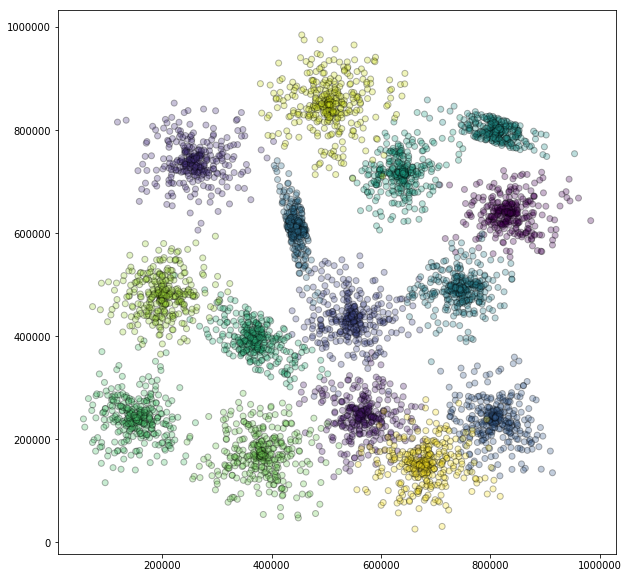

In [2]:
points, labels = np.loadtxt('data/clustering.txt'), np.loadtxt('data/clustering_labels.txt')
labels = labels.astype(int)
print("True number of clusters is {}".format(np.max(labels)))
plt.figure(figsize=(10, 10))
plt.scatter(points[:,0], points[:,1], c=labels, alpha=0.3, edgecolor='k')
plt.show()

In [3]:
### BEGIN Solution
import itertools
from sklearn.model_selection import cross_val_score
from sklearn.cluster import AgglomerativeClustering, Birch, KMeans
from sklearn.metrics import mutual_info_score, silhouette_score
from sklearn.mixture import GaussianMixture

def scoring(estimator, X, y):
    estimator.fit(X, y)
    return silhouette_score(X, estimator.labels_)


def scoring_gaussian(estimator, X, y):
    estimator.fit(X, y)
    return silhouette_score(X, estimator.predict(X))


def grid_search(estimator, X, y, param_grid, cv=3):
    scores = []
    # https://codereview.stackexchange.com/questions/171173/list-all-possible-permutations-from-a-python-dictionary-of-lists
    keys, values = zip(*param_grid.items())
    experiments = [dict(zip(keys, v)) for v in itertools.product(*values)]
    for exp in experiments:
        try:
            scoring_function = scoring
            if estimator == KMeans:
                model = estimator(n_clusters=15, random_state=13, **exp)
            elif estimator == GaussianMixture:
                model = estimator(n_components=15, random_state=13, **exp)
                scoring_function = scoring_gaussian
            else:
                model = estimator(n_clusters=15, **exp)
            score = cross_val_score(model, points, labels, cv=cv, scoring=scoring_function).mean()
            scores.append(score)
            print('Combination:', exp)
            print('Score:', scores[-1])
        except:
            continue
    max_score_idx = np.array(scores).argmax()
    return experiments[max_score_idx]

AgglomerativeClustering:

In [4]:
param_grid = {
    'affinity': ['euclidean', 'l1', 'l2', 'manhattan', 'cosine'],
    'linkage': ['complete', 'average', 'ward']
}

aggcl_params = grid_search(AgglomerativeClustering, points, labels, param_grid)
print('Best combination:', aggcl_params)

Combination: {'affinity': 'euclidean', 'linkage': 'complete'}
Score: 0.35250296635715767
Combination: {'affinity': 'euclidean', 'linkage': 'average'}
Score: 0.4314824442145979
Combination: {'affinity': 'euclidean', 'linkage': 'ward'}
Score: 0.3828585453749551
Combination: {'affinity': 'l1', 'linkage': 'complete'}
Score: 0.33891194990335244
Combination: {'affinity': 'l1', 'linkage': 'average'}
Score: 0.42818905671399493
Combination: {'affinity': 'l2', 'linkage': 'complete'}
Score: 0.35250296635715767
Combination: {'affinity': 'l2', 'linkage': 'average'}
Score: 0.4314824442145979
Combination: {'affinity': 'manhattan', 'linkage': 'complete'}
Score: 0.33891194990335244
Combination: {'affinity': 'manhattan', 'linkage': 'average'}
Score: 0.42818905671399493
Combination: {'affinity': 'cosine', 'linkage': 'complete'}
Score: -0.00829531175870168
Combination: {'affinity': 'cosine', 'linkage': 'average'}
Score: -0.0027626810898990404
Best combination: {'affinity': 'euclidean', 'linkage': 'average

Birch:

In [5]:
param_grid = {
    'threshold': [0.1, 0.3, 0.5, 0.7],
    'branching_factor': [10, 25, 50]
}

birch_params = grid_search(Birch, points, labels, param_grid)
print('Best combination:', birch_params)

Combination: {'threshold': 0.1, 'branching_factor': 10}
Score: 0.3828585453749551
Combination: {'threshold': 0.1, 'branching_factor': 25}
Score: 0.3828585453749551
Combination: {'threshold': 0.1, 'branching_factor': 50}
Score: 0.3828585453749551
Combination: {'threshold': 0.3, 'branching_factor': 10}
Score: 0.3828585453749551
Combination: {'threshold': 0.3, 'branching_factor': 25}
Score: 0.3828585453749551
Combination: {'threshold': 0.3, 'branching_factor': 50}
Score: 0.3828585453749551
Combination: {'threshold': 0.5, 'branching_factor': 10}
Score: 0.3828585453749551
Combination: {'threshold': 0.5, 'branching_factor': 25}
Score: 0.3828585453749551
Combination: {'threshold': 0.5, 'branching_factor': 50}
Score: 0.3828585453749551
Combination: {'threshold': 0.7, 'branching_factor': 10}
Score: 0.3828585453749551
Combination: {'threshold': 0.7, 'branching_factor': 25}
Score: 0.3828585453749551
Combination: {'threshold': 0.7, 'branching_factor': 50}
Score: 0.3828585453749551
Best combination

KMeans:

In [6]:
param_grid = {
    'init': ['k-means++', 'random'],
    'n_init': np.arange(6, 25, 2)
}

km_params = grid_search(KMeans, points, labels, param_grid)
print('Best combination:', km_params)

Combination: {'init': 'k-means++', 'n_init': 6}
Score: 0.3839356349015874
Combination: {'init': 'k-means++', 'n_init': 8}
Score: 0.38508618577645204
Combination: {'init': 'k-means++', 'n_init': 10}
Score: 0.3839845535446232
Combination: {'init': 'k-means++', 'n_init': 12}
Score: 0.3839845535446232
Combination: {'init': 'k-means++', 'n_init': 14}
Score: 0.38413663991437924
Combination: {'init': 'k-means++', 'n_init': 16}
Score: 0.38413663991437924
Combination: {'init': 'k-means++', 'n_init': 18}
Score: 0.38413663991437924
Combination: {'init': 'k-means++', 'n_init': 20}
Score: 0.39156236936525685
Combination: {'init': 'k-means++', 'n_init': 22}
Score: 0.39257076430328786
Combination: {'init': 'k-means++', 'n_init': 24}
Score: 0.39257076430328786
Combination: {'init': 'random', 'n_init': 6}
Score: 0.3698837091941756
Combination: {'init': 'random', 'n_init': 8}
Score: 0.374556248712483
Combination: {'init': 'random', 'n_init': 10}
Score: 0.3738147920870695
Combination: {'init': 'random', 

GaussianMixture:

In [7]:
param_grid = {
    'max_iter': [50, 75, 100, 150, 200],
    'covariance_type': ['full', 'tied', 'diag', 'spherical'],
    'init_params': ['kmeans', 'random']
}

gm_params = grid_search(GaussianMixture, points, labels, param_grid)
print('Best combination:', gm_params)

Combination: {'max_iter': 50, 'covariance_type': 'full', 'init_params': 'kmeans'}
Score: 0.3178366613645051
Combination: {'max_iter': 50, 'covariance_type': 'full', 'init_params': 'random'}
Score: 0.16603515152228063
Combination: {'max_iter': 50, 'covariance_type': 'tied', 'init_params': 'kmeans'}
Score: 0.404298262267835
Combination: {'max_iter': 50, 'covariance_type': 'tied', 'init_params': 'random'}
Score: 0.27963695772082214
Combination: {'max_iter': 50, 'covariance_type': 'diag', 'init_params': 'kmeans'}
Score: 0.3504890230580692
Combination: {'max_iter': 50, 'covariance_type': 'diag', 'init_params': 'random'}
Score: 0.3550279075804736
Combination: {'max_iter': 50, 'covariance_type': 'spherical', 'init_params': 'kmeans'}
Score: 0.27681002377257197
Combination: {'max_iter': 50, 'covariance_type': 'spherical', 'init_params': 'random'}
Score: 0.2858357200210076
Combination: {'max_iter': 75, 'covariance_type': 'full', 'init_params': 'kmeans'}
Score: 0.3178366613645051
Combination: {'m

Metrics results:

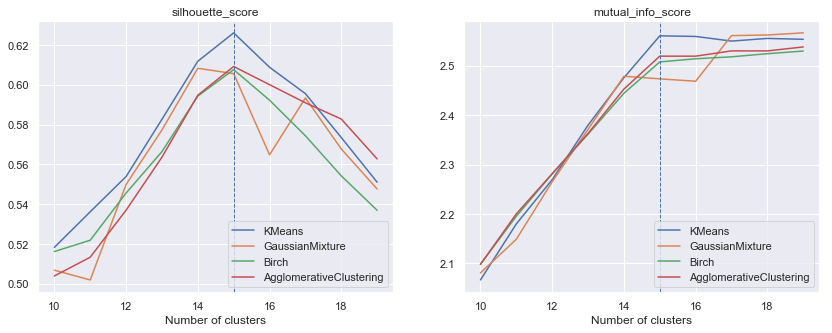

In [8]:
import seaborn as sns
sns.set()

silhouette_scores = {
    'KMeans': [],
    'GaussianMixture': [],
    'Birch': [],
    'AgglomerativeClustering': []
}

mutual_info_scores = {
    'KMeans': [],
    'GaussianMixture': [],
    'Birch': [],
    'AgglomerativeClustering': []
}

clustering_labels = ['KMeans', 'Birch', 'AgglomerativeClustering']

for i in range(10, 20):
    models = [
        KMeans(n_clusters=i, **km_params, random_state=13),
        Birch(n_clusters=i, **birch_params),
        AgglomerativeClustering(n_clusters=i, **aggcl_params)
    ]
    for label, model in zip(clustering_labels, models):
        model.fit(points)
        silhouette_scores[label].append(silhouette_score(points, model.labels_))
        mutual_info_scores[label].append(mutual_info_score(labels, model.labels_))
    gm = GaussianMixture(n_components=i, **gm_params, random_state=13)
    gm.fit(points)
    y_pred = gm.predict(points)
    silhouette_scores['GaussianMixture'].append(silhouette_score(points, y_pred))
    mutual_info_scores['GaussianMixture'].append(mutual_info_score(labels, y_pred))

fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].set_title('silhouette_score')
ax[1].set_title('mutual_info_score')
for label in silhouette_scores.keys():
    ax[0].plot(range(10, 20), silhouette_scores[label], label=label)
    ax[1].plot(range(10, 20), mutual_info_scores[label], label=label)
for ax_col in ax:
    ax_col.set_xlabel('Number of clusters')
    ax_col.axvline(15, linewidth=1, linestyle='--')
    ax_col.legend(loc='best')
plt.show()

Clustering results:

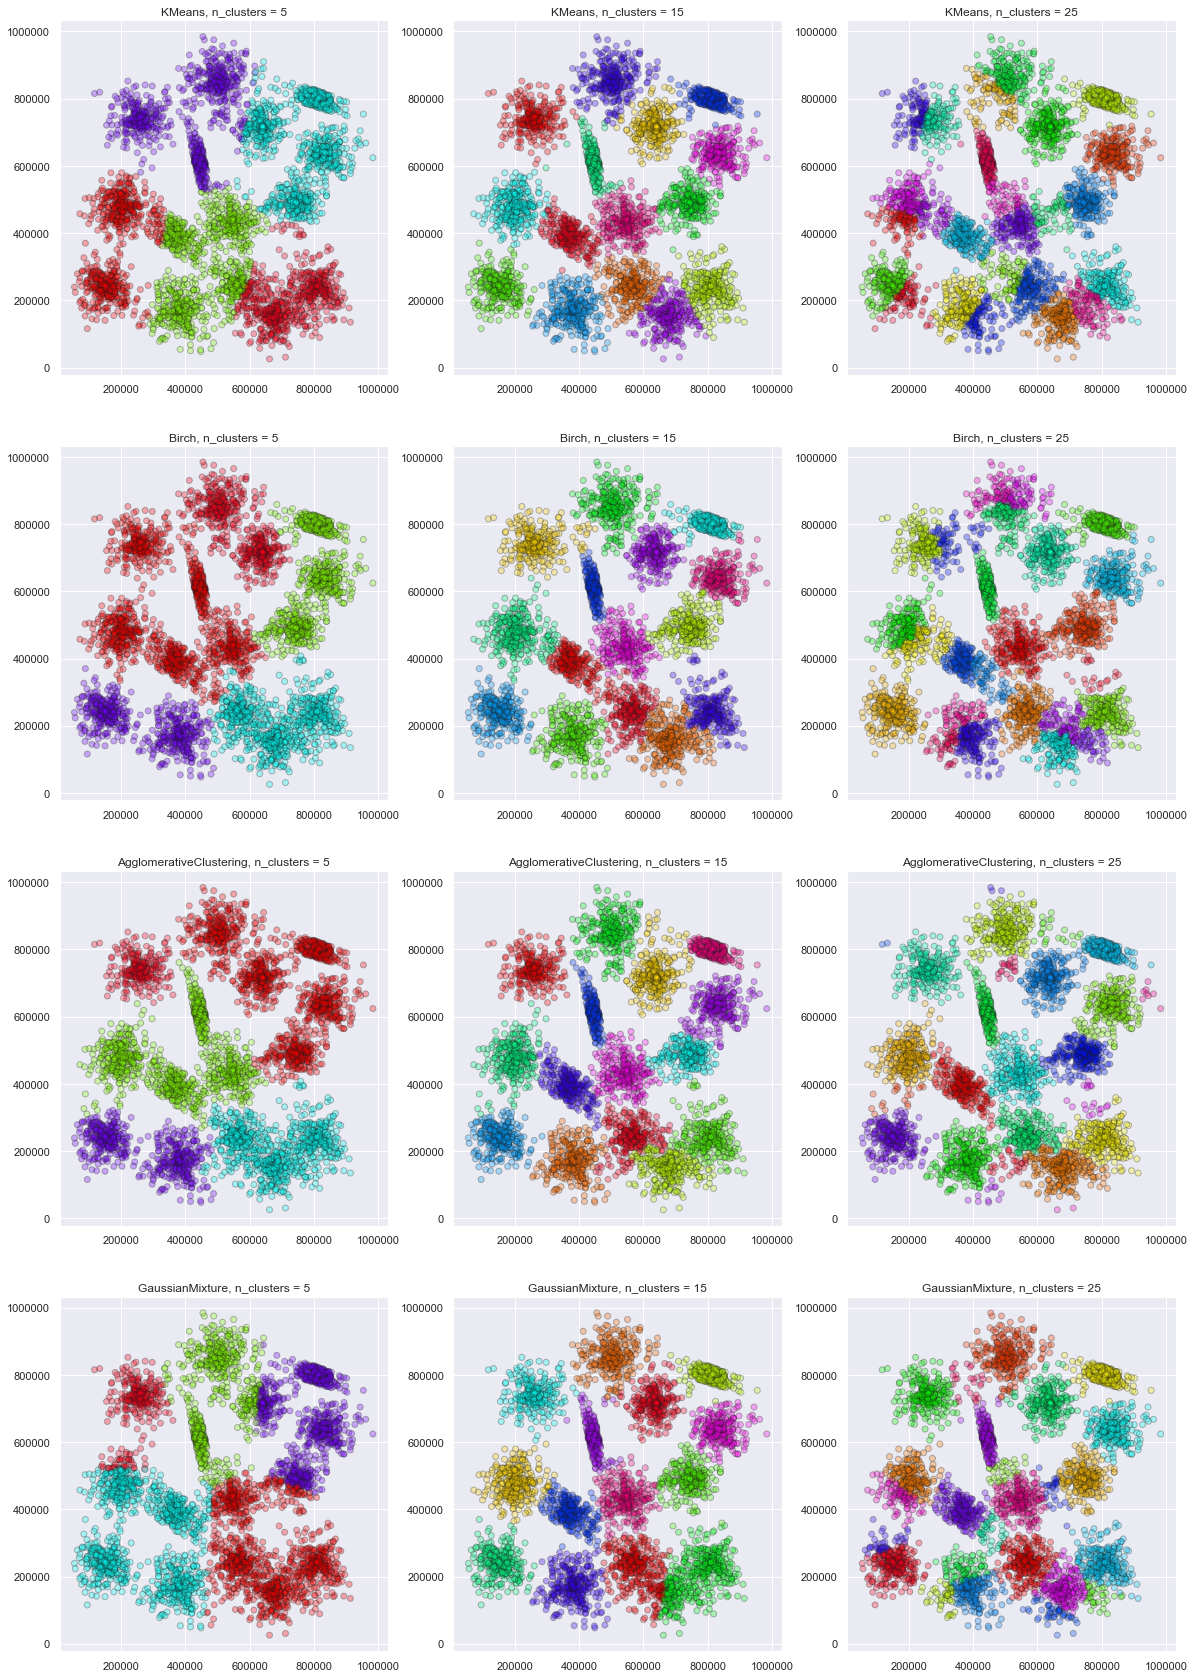

In [9]:
fig, ax = plt.subplots(nrows=4, ncols=3)
fig.set_size_inches(20, 30)
cluster_sizes = [5, 15, 25]
models = [
    KMeans(**km_params, random_state=13),
    Birch(**birch_params),
    AgglomerativeClustering(**aggcl_params),
    GaussianMixture(**gm_params, random_state=13)
]
model_names = ['KMeans', 'Birch', 'AgglomerativeClustering', 'GaussianMixture']
for i in range(len(ax)):
    model = models[i]   
    for j in range(len(ax[i])):
        n = cluster_sizes[j]
        if i != len(ax) - 1:
            model.n_clusters = n
            model.fit(points)
            c = model.labels_
        else:
            model.n_components = n
            model.fit(points)
            c = model.predict(points)
        ax[i, j].scatter(points[:, 0], points[:, 1], c=c, alpha=0.3, edgecolor='k', cmap='hsv')
        ax[i, j].set_title('{}, n_clusters = {}'.format(model_names[i], n))
plt.show()
### END Solution

<br>

### Task 1.2 (2 pt.): Finding the Number of Clusters with Bootstrap

For a chosen algorithm find the best number of clusters using bootstrap.

So, first, based on your observations made at the previous task, choose one algorithm assuming **you do not have true labels and do not know the true number of clusters**.

1. **(1 pt.)** Estimate variance of the metric and construct normal 95% **confidence intervals**;
2. **(1 pt.)** **Plot the metric** with the corresponding confidence intervals and choose the best number of clusters.

In [10]:
from tqdm import tqdm_notebook

### BEGIN Solution
import scipy.stats as sts

cluster_ns = range(12, 19)
sample_number = 100

CI_lower_bounds = []
CI_upper_bounds = []
mean_scores = []

for i_cn, n_clusters in tqdm_notebook(enumerate(cluster_ns)):
    # I chose KMeans, because it showed the best quality in the previous exercise
    km = KMeans(n_clusters=n_clusters, **km_params, random_state=13)
    metric_scores = []
    for sample_index in tqdm_notebook(range(sample_number)):
        random_sample_idx = np.random.choice(np.arange(len(points)), size=len(points) // 2)
        points_sample = points[random_sample_idx]
        labels_sample = labels[random_sample_idx]
        km.fit(points_sample)
        metric_scores.append(silhouette_score(points_sample, km.labels_))
    mu_est = np.mean(metric_scores)
    std_est = np.std(metric_scores, ddof=1)
    z = sts.norm.ppf(0.975)
    CI_lower_bounds.append(mu_est - z * std_est)
    CI_upper_bounds.append(mu_est + z * std_est)
    mean_scores.append(mu_est)

### END Solution

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

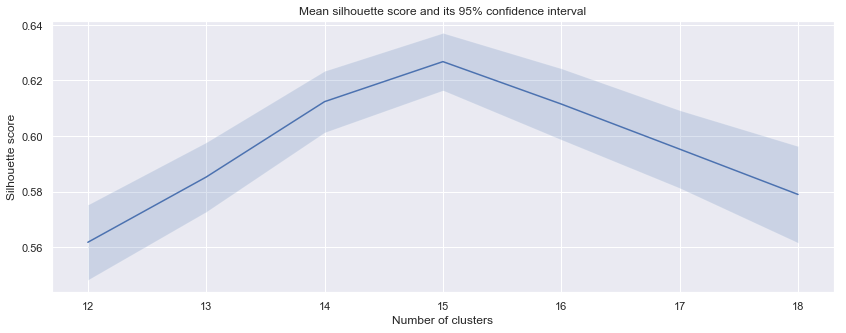

In [11]:
plt.plot(cluster_ns, mean_scores)
plt.fill_between(cluster_ns, CI_lower_bounds, CI_upper_bounds, alpha=0.2)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Mean silhouette score and its 95% confidence interval')
plt.show()

So, the best number of clusters is 15.

<br>

# Dimentionality Reduction and Manifold Learning

## Task 2 (1 + 1 + 2 + 1 = 5 pt.)

Assume that you have $n$ points in $D$ dimensional space:

$$u_1, ..., u_n \in \mathbb R^D.$$

There exist a *linear* data transformation $F(u): \mathbb R^D \rightarrow \mathbb R^d, D >> d$ such that:

$$(1-\delta) \|u_i - u_j\|^2 \leq \|F(u_i) - F(u_j)\|^2\leq (1+\delta) \|u_i - u_j\|^2$$

with high probability.

The transformation $F(u)$ is: $F(u) = \tfrac{1}{\sqrt d}Xu$, and $X \in \mathbb R^{d \times D}$ is a random matrix, components of which are independent identically distributed $X_{ij} \sim \mathcal{N}(0, 1)$.

This statement means that there exists a matrix that reduces the original dimensionality such that pairwise distances are not distorted much. This is a theoretical probabilistic result that *guarantees* you such a transformation. We will obtain a bound on $d$ for which this result holds true.

**Chernoff inequality.** This unequality states a bound on distribution tail.

$$\mathbb P(X \geq t) \leq \frac{\mathbb E \exp(\lambda X)}{\exp(\lambda t)}$$

**Definition.** Random variable $X$ is called subexponential with parameters $(\sigma^2, b)$, if for all $\lambda: |\lambda| < \frac{1}{b}$ the following is true:

$$\mathbb E \exp(\lambda (X - \mathbb E X)) \leq \exp\left(\frac{\lambda^2\sigma^2}{2}\right)$$

**Fact.** $\chi^2$ distribution with $d$ degrees of freedom is a sum of squares of $d$ independent standard gaussian random variables.


**Fact.** $\chi^2$ distribution with $d$ degrees of freedom is subexponential with parameters $\sigma^2 = 4d, b = 4$

<br>

### Task 2.1 (1 pt.):

Using the above information, prove that for $Y \sim \chi^2$ with $d$ degrees of freedom the following inequality holds true:

$$\mathbb P (\lvert Y - d \rvert \geq t) \leq 2\exp\left(\frac{-t^2}{8d}\right)$$

for $t \leq \frac{\sigma^2}{b}$. 

**Hint**: you will need to optimise the power of exponential in order to get optimal $\lambda$.

**BEGIN Solution**

According to the Chernoff inequality and the facts above (and also that $\mathbb{E}Y = d$), we have:

$$
\mathbb{P}\left(Y - d \geq t\right) \leq \frac{\mathbb{E}e^{\lambda(Y - d)}}{e^{\lambda t}} \leq e^{2d\lambda^2 - t\lambda}
$$

This holds for every $\lambda : |\lambda| < \frac{1}{4}$, but let's find such bound which holds for every $\lambda \in \mathbb{R}$. In this case a point of minimum of the function $2d\lambda^2 - t\lambda$ should be in $\left(-\frac{1}{4}, \frac{1}{4}\right)$. Let's find the point of minimum:

$$
f(\lambda) = 2d\lambda^2 - t\lambda
$$
$$
f'(\lambda) = 4d\lambda - t = 0 \Rightarrow \lambda = \frac{t}{4d} < \frac{1}{4} \Rightarrow t < d
$$
$$
f''(\lambda) = 4d > 0
$$

Substituting $\lambda = \frac{t}{4d}$ to the inequality above, we obtain:

$$
\mathbb{P}\left(Y - d \geq t\right) \leq e^{\frac{t^2}{8d} - \frac{t^2}{4d}} = e^{-\frac{t^2}{8d}}
$$

Analogically:

$$
\mathbb{P}\left(Y - d \leq -t\right) = \mathbb{P}\left(-Y + d \geq t\right) \leq \frac{\mathbb{E}e^{\lambda(-Y + d)}}{e^{\lambda t}} \leq e^{2d\lambda^2 - t\lambda}
$$

This case is the same as the previous one, but with a random variable $-Y$ instead of $Y$. Here we may see that the upper bound is the same, so:

$$
\mathbb{P}\left(Y - d \leq -t\right) \leq e^{-\frac{t^2}{8d}}
$$

Finally, we may obtain the result:

$$
P\left(|Y - d| \geq t \right) = \mathbb{P}\left(Y - d \geq t\right) + \mathbb{P}\left(Y - d \leq -t\right) \leq 2e^{-\frac{t^2}{8d}}
$$
for $t \leq d$, q.e.d.

**END Solution**

<br>

### Task 2.2 (1 pt.):

Prove that $\frac{\|Xu\|^2}{\|u\|^2}$ is $\chi_2$ random variable with $d$ degrees of freedom.

**BEGIN Solution**

$$
\frac{\|Xu\|^2}{\|u\|^2} = \frac{\sum\limits_{i=1}^d\left(\sum\limits_{j=1}^DX_{ij}u_j\right)^2}{\|u\|^2} = \sum\limits_{i=1}^d\left(\frac{\sum\limits_{j=1}^DX_{ij}u_j}{\sqrt{\sum\limits_{j=1}^Du_j^2}}\right)^2
$$

Notice that $X_{ij}$ are iid standard normally distributed random variables. Then:

$$
\mathbb{E}\left[\frac{\sum\limits_{j=1}^DX_{ij}u_j}{\sqrt{\sum\limits_{j=1}^Du_j^2}}\right] = 0
$$
$$
\mathbb{D}\left[\frac{\sum\limits_{j=1}^DX_{ij}u_j}{\sqrt{\sum\limits_{j=1}^Du_j^2}}\right] = \frac{\sum\limits_{j=1}^Du_j^2}{\sum\limits_{j=1}^Du_j^2} = 1
$$

Hence, $\frac{\sum\limits_{j=1}^DX_{ij}u_j}{\sqrt{\sum\limits_{j=1}^Du_j^2}} \sim \mathcal{N}(0, 1)$. Therefore, $\frac{\|Xu\|^2}{\|u\|^2}$ is a sum of $d$ squares of standard normally distributed random variables, and thus it is a $\chi^2$-random variable with $d$ degrees of freedom, q.e.d.

**END Solution**

<br>

### Task 2.3 (2 pt.)

Having all of the previous results, we now may apply them to get the bound.

From inequality for tails from Task 4.1 we get that:

$$\mathbb P \left(\left\lvert \frac{\|Xu\|^2}{\|u\|^2} - d \right\rvert \geq t\right) \leq 2\exp\left(\frac{-t^2}{8d}\right)$$

This means that probability of such event that our distances will change a lot is bounded.

1. Show that if probability above is small, then probability of: $$(1-\delta) \|u_i - u_j\|^2 \leq \|\frac{1}{\sqrt d} X(u_i - u_j)\|^2\leq (1+\delta) \|u_i - u_j\|^2$$ is big and basically almost equal to $1 - n(n-1)\exp \left(-\frac{\delta^2d}{8}\right)$.

2. After the previous step, we got that if we want to have our inequalities to be true with high probability $1-\varepsilon$, we want to bound it from above. Derive the inequality for $d$ from that.

**Hint:**
* at some point you would like to take $\delta = \frac{t}{d}$. Note that it makes $\delta$ be in range of 0 and 1

**BEGIN Solution**

1) Let's take some pair of points $u_i, u_j$. Denoting $u_i - u_j = u$, we obtain:

\begin{eqnarray}
\mathbb{P}\left((1 - \delta)\|u\|^2 \leq \frac{1}{d}\|Xu\|^2 \leq (1 + \delta)\|u\|^2\right) =\\
&&= \mathbb{P}\left(d(1 - \delta) \leq \frac{\|Xu\|^2}{\|u\|^2} \leq d(1 + \delta)\right) =\\
&&= \mathbb{P}\left(-d\delta \leq \frac{\|Xu\|^2}{\|u\|^2} - d \leq d\delta\right) =\\
&&= \mathbb{P}\left(\left|\frac{\|Xu\|^2}{\|u\|^2} - d\right| \leq d\delta\right) =\\
&&= 1 - \mathbb{P}\left(\left|\frac{\|Xu\|^2}{\|u\|^2} - d\right| \geq t\right) \geq 1 - 2e^{-\frac{t^2}{8d}},
\end{eqnarray}

where $t = d\delta \Rightarrow \delta = \frac{t}{d}$.

So, if $\mathbb{P}\left(\left|\frac{\|Xu\|^2}{\|u\|^2} - d\right| \geq t\right)$ is small, then $\mathbb{P}\left((1 - \delta)\|u\|^2 \leq \frac{1}{d}\|Xu\|^2 \leq (1 + \delta)\|u\|^2\right)$ is big. Now notice that the bound in the inequality

$$
\mathbb{P}\left(\left|\frac{\|Xu\|^2}{\|u\|^2} - d\right| \geq t\right) \leq 2e^{-\frac{t^2}{8d}}
$$

doesn't depend on $u$. Also notice that initially we took only one pair of points among total $\frac{n(n-1)}{2}$. If we consider the same probability but applied to all possible pairs of points, we may obtain:

$$
\mathbb{P}\left((1 - \delta)\|u\|^2 \leq \frac{1}{d}\|Xu\|^2 \leq (1 + \delta)\|u\|^2\right) \geq \left(1 - 2e^{-\frac{t^2}{8d}}\right)^{\frac{n(n-1)}{2}} \approx 1 - \frac{n(n-1)}{2} \cdot 2e^{-\frac{t^2}{8d}} = 1 - n(n-1)e^{-\frac{\delta^2d}{8}}
$$

If we limit $\mathbb{P}\left(\left|\frac{\|Xu\|^2}{\|u\|^2} - d\right| \geq t\right)$ to zero, then $\mathbb{P}\left((1 - \delta)\|u\|^2 \leq \frac{1}{d}\|Xu\|^2 \leq (1 + \delta)\|u\|^2\right)$ limits to $1$ and has a lower bound $1 - n(n-1)e^{-\frac{\delta^2d}{8}}$. Therefore, we may say that $\mathbb{P}\left((1 - \delta)\|u\|^2 \leq \frac{1}{d}\|Xu\|^2 \leq (1 + \delta)\|u\|^2\right) \approx 1 - n(n-1)e^{-\frac{\delta^2d}{8}}$, q.e.d.

2) Now we want to bound our probability above, hence we have:

$$
1 - n(n-1)e^{-\frac{\delta^2d}{8}} \geq 1 - \varepsilon \Rightarrow n(n-1)e^{-\frac{\delta^2d}{8}} \leq \varepsilon \Rightarrow -d \leq \frac{8}{\delta^2}\ln\left(\frac{\varepsilon}{n(n-1)}\right) \Rightarrow d \geq \frac{8}{\delta^2}\ln\left(\frac{n(n-1)}{\varepsilon}\right)
$$

**END Solution**

<br>

### Task 2.4 (1 pt.)

We have sucessfully got our lower bound on the dimensionality we can safely reduce to such that pairwise distances do not change much: 

$$d \geq \frac{8}{\delta^2}\log\left(\frac{n(n-1)}{\varepsilon}\right)$$

Note the beauty of that inequality. It **doesn't depend** on original dimensionality $D$, parameters $n$ -- number of samples and $\varepsilon$ -- probability are under the $\log$ function.

This bound is not very tight, using more advanced techniques you may improve it. That means, our estimate of $d$ may be too high, but we can guarantee our result for it. Also remember that this approach is probabilistic, and, basically, depends on how lucky you will be with your data. It is very useful in case of extremely large dimensionalities $D$, and allows to reduce dimensionality while preserving the structure of data.

Now implement the obtained result and confirm that it holds true:

1. Fetch *20news* dataset
2. Check the dimensionality of data
3. Generate a random matrix of the corresponding size. **Note** that this might take a while (or you may run out of memory).
4. Fix $\delta$ = 0.15 and $\varepsilon$ = 0.01
5. Show that distances of transformed data are within the delta tube. Write down 1-2 sentences to point out the ratio. Remember that our result is not applicable in case if distance is 0
6. Show that for smaller $d$ this result doesn't work. You will have to take much smaller $d$ in order to show that (ten times less, for example). Write down 1-2 sentences, describing the result .

In [12]:
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.metrics.pairwise import euclidean_distances
from numpy.random import standard_normal

X = fetch_20newsgroups_vectorized()
X.data.shape

(11314, 130107)

In [13]:
### BEGIN Solution
delta = 0.15
eps = 0.01
n, D = X.data.shape

np.random.seed(13)
d = int(np.ceil(8 * np.log(n * (n - 1) / eps) / delta ** 2))
# transformation matrix
A = np.random.normal(size=(d, D))
u_norms = euclidean_distances(X.data, X.data, squared=True)
X_transformed = X.data @ A.T / np.sqrt(d)
Xu_norms = euclidean_distances(X_transformed, X_transformed, squared=True)
Y = np.nan_to_num(Xu_norms / u_norms)
# inf -> 0
Y -= Y * (Y > 1e308)
# 0 -> 1
Y += np.isclose(Y, 0)
if (Y >= 1 - delta).all() and (Y <= 1 + delta).all():
    print('Distances are within the delta tube')
else:
    print('Distances are not within the delta tube')

Distances are within the delta tube


In [14]:
np.random.seed(13)
d = int(np.ceil(8 * np.log(n * (n - 1) / eps) / delta ** 2) / 10)
# transformation matrix
A = np.random.normal(size=(d, D))
u_norms = euclidean_distances(X.data, X.data, squared=True)
X_transformed = X.data @ A.T / np.sqrt(d)
Xu_norms = euclidean_distances(X_transformed, X_transformed, squared=True)
Y = np.nan_to_num(Xu_norms / u_norms)
# inf -> 0
Y -= Y * (Y > 1e308)
# 0 -> 1
Y += np.isclose(Y, 0)
if (Y >= 1 - delta).all() and (Y <= 1 + delta).all():
    print('Distances are within the delta tube')
else:
    print('Distances are not within the delta tube')
### END Solution

Distances are not within the delta tube


So, we see that the bound derived is actually working. Taking $d$ according to the formula above, we are able to reduce dimensionality without big differences in distances. However, if we take much smaller $d$, the distances are changing more.

<br>

## Task 3 (2 + 3 = 6 pt.). MNIST principal component analysis 

### Task 3.1 (2 pt.)

Download `MNIST` dataset. Here we will estimate the data intrinsic dimensionality, decompose the dataset into principal components and estimate the cumulative explained variance by each component.

You can either use the method proposed here https://www.stat.berkeley.edu/~bickel/mldim.pdf for the sample intrinsic dimension estimation, or any other method known to you. For the first case, you can use implemented code from here https://gist.github.com/mehdidc/8a0bb21a31c43b0cbbdd31d75929b5e4 

1. Estimate the intrinsic dimensionality of the dataset. Provide the plot.
2. Decompose the data into principal components (PCA). Plot the cumulative explained variance by each component.
3. Plot the example of reconstructed image with **6** different sets of components and prove the corresponding explained variance. You can choose any digit from the dataset.

In [15]:
# https://gist.github.com/mehdidc/8a0bb21a31c43b0cbbdd31d75929b5e4
def intrinsic_dim_sample_wise(X, k=5):
    neighb = NearestNeighbors(n_neighbors=k + 1).fit(X)
    dist, ind = neighb.kneighbors(X)
    dist = dist[:, 1:]
    dist = dist[:, 0:k]
    assert dist.shape == (X.shape[0], k)
    assert np.all(dist > 0)
    d = np.log(dist[:, k - 1: k] / dist[:, 0:k-1])
    d = d.sum(axis=1) / (k - 2)
    d = 1. / d
    intdim_sample = d
    return intdim_sample

def intrinsic_dim_scale_interval(X, k1=10, k2=20):
    X = pd.DataFrame(X).drop_duplicates().values # remove duplicates in case you use bootstrapping
    intdim_k = []
    for k in range(k1, k2 + 1):
        m = intrinsic_dim_sample_wise(X, k).mean()
        intdim_k.append(m)
    return intdim_k

def repeated(func, X, nb_iter=100, random_state=None, verbose=0, mode='bootstrap', **func_kw):
    if random_state is None:
        rng = np.random
    else:
        rng = np.random.RandomState(random_state)
    nb_examples = X.shape[0]
    results = []

    iters = range(nb_iter)
    if verbose > 0:
        iters = tqdm(iters)    
    for i in iters:
        if mode == 'bootstrap':
            Xr = X[rng.randint(0, nb_examples, size=nb_examples)]
        elif mode == 'shuffle':
            ind = np.arange(nb_examples)
            rng.shuffle(ind)
            Xr = X[ind]
        elif mode == 'same':
            Xr = X
        else:
            raise ValueError('unknown mode : {}'.format(mode))
        results.append(func(Xr, **func_kw))
    return results

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [11:28<00:00,  6.88s/it]


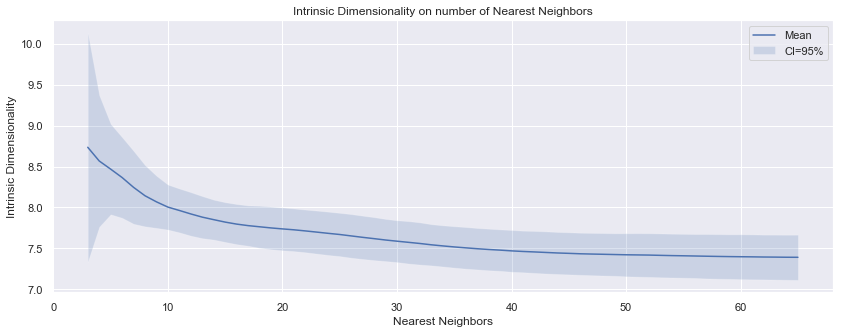

In [16]:
from sklearn import datasets
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm


digits = datasets.load_digits()

data = StandardScaler().fit_transform(digits.data)

### BEGIN Solution
results = repeated(intrinsic_dim_scale_interval, data, random_state=13, verbose=1, k1=3, k2=65)
results = np.array(results)

mu_est = np.mean(results, axis=0)
std_est = np.std(results, axis=0, ddof=1)
z = sts.norm.ppf(0.975)
CI_lower_bounds = mu_est - z * std_est
CI_upper_bounds = mu_est + z * std_est

plt.plot(range(3, 66), np.array(results).mean(axis=0), label='Mean')
plt.fill_between(range(3, 66), CI_lower_bounds, CI_upper_bounds, alpha=0.2, label='CI=95%')
plt.xlabel('Nearest Neighbors')
plt.ylabel('Intrinsic Dimensionality')
plt.title('Intrinsic Dimensionality on number of Nearest Neighbors')
plt.legend(loc='best')
plt.show()

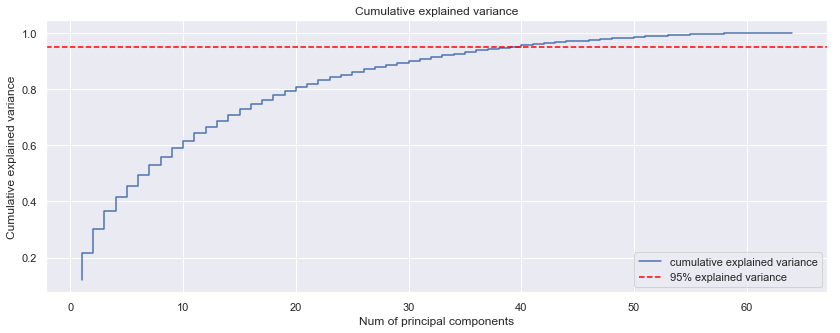

In [17]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(data)

plt.step(range(1, 65), pca.explained_variance_ratio_.cumsum(), label='cumulative explained variance')
plt.axhline(0.95, c='red', linestyle='--', label='95% explained variance')
plt.title('Cumulative explained variance')
plt.xlabel('Num of principal components')
plt.ylabel('Cumulative explained variance')
plt.legend(loc='best')
plt.show()

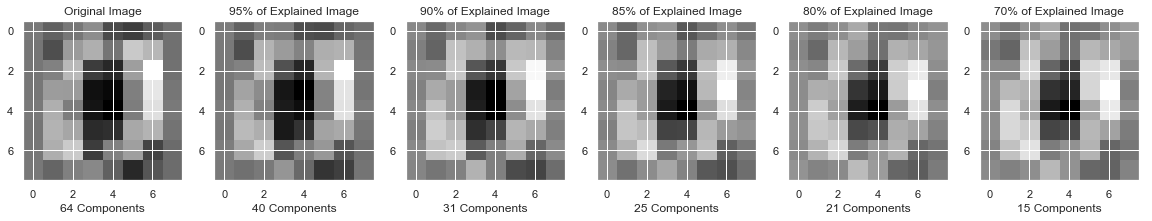

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=6)
fig.set_size_inches(20, 30)
explained = [100, 95, 90, 85, 80, 70]
for i in range(6):
    exp_var = explained[i]
    if exp_var == 100:
        ax[i].set_title('Original Image')
        pca = PCA()
    else:
        ax[i].set_title('{}% of Explained Image'.format(exp_var))
        pca = PCA(n_components=exp_var / 100)
    data_pca = pca.fit_transform(data)
    data_exp = pca.inverse_transform(data_pca)
    ax[i].imshow(data_exp[0].reshape(8, 8), cmap='gist_gray')
    ax[i].set_xlabel('{} Components'.format(pca.n_components_))
plt.show()
### END Solution

<br>

### Task 3.2 (3 pt.)

Here we will visualize the decomposition, to observe how the data diverges across different manifold learning methods. We are to compare `PCA`, `ICA` and `Isomap` non-linear decompositions [see more over here https://scikit-learn.org/stable/modules/manifold.html], and check the classification accuracies on the new features. 

1. **(1 pt.)** Visualise ICA, PCA and Isomap 3D decomposition on 3 components in `plotly`. Be sure that the data is whitened (scaled). 
2. **(1 pt.)** Calculate new features of the data with ICA, PCA, and Isomap. **Choose the number of components according to your estimation of intrinsic dimention, see Task 3.1**. Calculate the classification accuracy on these features with `LogisticRegression` on cv=5, 3 repeats. Use `RepeatedKFold` and fix the `random_seed=0`.
3. **(1 pt.)** Show that `Isomap` gives statistically significant improvement on the classification accuracy with any appropriate statistical test (for example `scipy.stats.ttest_ind`). Provide corresponding `p-values`. Justify your results, write down 2-3 sentences.

In [22]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
import plotly.graph_objs as go
import colorlover as cl
import pandas as pd
from sklearn.manifold import Isomap 

from sklearn.decomposition import FastICA

init_notebook_mode(connected=True)

iso = Isomap(n_neighbors=5, n_components=3, eigen_solver='dense')

### BEGIN Solution
pca = PCA(n_components=3)
ica = FastICA(n_components=3)
data_pca = pca.fit_transform(data)
data_ica = ica.fit_transform(data)
data_iso = iso.fit_transform(data)
### END Solution

In [54]:
# https://plot.ly/python/3d-scatter-plots/
def plot3d(data):
    trace = go.Scatter3d(
        x=data[:, 0],
        y=data[:, 1],
        z=data[:, 2],
        mode='markers',
        marker=dict(
            size=12,
            color=digits.target,
            colorscale='Viridis',
            opacity=0.7
        )
    )
    
    layout = go.Layout(
        margin=dict(
            l=0,
            r=0,
            b=0,
            t=0
        )
    )
    fig = go.Figure(data=[trace], layout=layout)
    iplot(fig, show_link = False)

In [55]:
plot3d(data_pca)

In [56]:
plot3d(data_ica)

In [57]:
plot3d(data_iso)

In [74]:
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs',multi_class='multinomial')
rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)

scores = list()

### BEGIN Solution
methods = [pca, ica, iso]
acc = []
std = []
for model in methods:
    # according to task 3.1, 8 components should be enough
    model.n_components = 8
    data_model = model.fit_transform(data)
    scores_model = cross_val_score(logreg, data_model, digits.target, scoring='accuracy', cv=rkf)
    scores.append(scores_model)
    acc.append(scores_model.mean())
    std.append(scores_model.std())

labels = ['PCA', 'ICA', 'Isomap']
results = pd.DataFrame([labels, acc, std], columns=[1, 2, 3], index=['dim.reduction method', 'mean accuracy', 'std']).T
results
### END Solution

dim.reduction method mean accuracy        std
1                  PCA      0.872929  0.0187944
2                  ICA      0.721379  0.0348506
3               Isomap      0.953442  0.0121267

In [83]:
from scipy.stats import ttest_ind
test_res1 = ttest_ind(scores[0], scores[1])
test_res1

Ttest_indResult(statistic=14.321125114908982, pvalue=2.0657515716752726e-14)

In [84]:
print('Statistically significant improvement of PCA decomposition over ICA: p-value', test_res1.pvalue)

Statistically significant improvement of PCA decomposition over ICA: p-value 2.0657515716752726e-14


In [85]:
test_res2 = ttest_ind(scores[0], scores[2])
test_res2

Ttest_indResult(statistic=-13.468444860945992, pvalue=9.332830369192243e-14)

In [86]:
print('Statistically significant improvement of Isomap decomposition over PCA: p-value', test_res2.pvalue)

Statistically significant improvement of Isomap decomposition over PCA: p-value 9.332830369192243e-14


So, we see that here ICA is dominated by PCA and Isomap and Isomap works the best in the task. A possible explanation is that data appears to be not as separable to work with ICA as compressible to work with PCA. Finally, approximation of geodesic distances (Isomap) proves to be the best method in this case.

<br>

### Task 3.3* (4 pt.). Bonus.

Explore `KMNIST` dataset https://github.com/rois-codh/kmnist (Kuzushiji-MNIST (10 classes, 28x28, 70k examples)). You are to engineer new features with any convenient method of Manifold Learning to increase the classification accuracy. Use the $k$NN classifier and validation code from here https://github.com/rois-codh/kmnist/blob/master/benchmarks/kuzushiji_mnist_knn.py. Your accuracy on the test should be more than `91.56%`.

**NOTE** that the data is rather heavy, thus your decomposition will take a while.

In [2]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

# https://github.com/rois-codh/kmnist/blob/master/benchmarks/kuzushiji_mnist_knn.py
def load(f):
    return np.load(f)['arr_0']

# Load the data
x_train = load('data/kmnist-train-imgs.npz')
x_test = load('data/kmnist-test-imgs.npz')
y_train = load('data/kmnist-train-labels.npz')
y_test = load('data/kmnist-test-labels.npz')

# Flatten images
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [4]:
pca = PCA(n_components=50)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

clf = KNeighborsClassifier(n_neighbors=4, weights='distance')
print('Fitting', clf)
clf.fit(x_train_pca, y_train)
print('Evaluating', clf)

test_score = clf.score(x_test_pca, y_test)
print('Test accuracy:', test_score)

Fitting KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='distance')
Evaluating KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='distance')
Test accuracy: 0.9382


In [5]:
from sklearn.manifold import Isomap

iso = Isomap(n_neighbors=5, n_components=40, eigen_solver='dense')

x_train_iso = iso.fit_transform(x_train)
x_test_iso = iso.transform(x_test)

clf = KNeighborsClassifier(n_neighbors=4, weights='distance')
print('Fitting', clf)
clf.fit(x_train_iso, y_train)
print('Evaluating', clf)

test_score = clf.score(x_test_iso, y_test)
print('Test accuracy:', test_score)

MemoryError: 